<a href="https://colab.research.google.com/github/Lourdes-Tolotto/ML/blob/main/TP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd


In [156]:
from scipy.stats import normaltest

# Se analiza un conjunto de datos para determinar si tienen distribucion normal

def print_hist(data, data_name, ax):
    
    # Con este criterio se asume que los datos tienen una distribucion normal
    # si p_value>0.5
    stat, p_value = normaltest(data)
    
    if p_value > 0.05: 
      normal = True
      sns.histplot(data, kde=True, ax=ax, color='green')
      ax.set_title(data_name + ' (Posee D. Normal)')
    else: 
      normal = False
      sns.histplot(data, kde=True, ax=ax, color='red')
      ax.set_title(data_name + ' (NO Posee D. Normal)')
    
    return normal
    

In [157]:
# Imprime cada feature del dataset informando si tiene distribucion normal o no

def DF_analysis(df, fig_fils, fig_cols):
    
    features = df.columns
    fig, axes = plt.subplots(fig_fils, fig_cols, figsize=(25,30))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.ravel()

    count = 0

    """for feature, ax in zip(features, axes):
        if feature != avoid_name :
          if print_hist(df[feature], feature, ax)==True : count = count + 1
    """
    for feature, ax in zip(features, axes):
        if print_hist(df[feature], feature, ax)==True : count = count + 1

    print("Features con distribución normal: ",count)

    fig.suptitle('Analisis de cada feature')
    plt.show()

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import multiprocessing

def Regression(model, selected_features, target, n, k, selector, model_name):

  rmse_train = []
  r2_train = []
  score_train = []
  rmse_test = []
  r2_test = []
  score_test = []

  for i in range(0,n):

    X_train, X_test, Y_train, Y_test = train_test_split(selected_features[i], 
                                      target, test_size = 0.3, 
                                      random_state=0)

    model.fit(X_train, Y_train)

    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    rmse_train.append(rmse)
    r2 = r2_score(Y_train, y_train_predict)
    r2_train.append(r2)
    score = cross_val_score(estimator = model, X = X_train, 
                  y = Y_train, scoring = 'neg_root_mean_squared_error', 
                  cv = 5).mean()
    score_train.append(-1*score)
    
    model.fit(X_test, Y_test)

    y_train_predict = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_train_predict)))
    rmse_test.append(rmse)
    r2 = r2_score(Y_test, y_train_predict)
    r2_test.append(r2)
    score = cross_val_score(estimator = model, X = X_test, 
                  y = Y_test, scoring = 'neg_root_mean_squared_error', 
                  cv = 5).mean()
    score_test.append(-1*score)

  tit = 'Reduccion de dimensionalidad usando selector ' 
  tit = tit + selector + ' y regresion ' + model_name
  
  fig, axes = plt.subplots(1, 2, figsize=(20,10))
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  plt.suptitle(tit)
    
  axes[0].plot(k, rmse_train, label="rmse")
  axes[0].plot(k, r2_train, label="r2")
  axes[0].plot(k, score_train, label="cv scores")
  axes[0].set_xlabel("Cantidad de features seleccionados")
  axes[0].set_title("Evolución de los parametros de evaluacion para train")
  axes[0].legend();
  
  axes[1].plot(k, rmse_test, label="rmse")
  axes[1].plot(k, r2_test, label="r2")
  axes[1].plot(k, score_test, label="cv scores")
  axes[1].set_xlabel("cantidad de features seleccionados")
  axes[1].set_title("Evolución de los parametros de evaluacion para test")
  axes[1].legend();
  


In [159]:
data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
data.info()
print()

df = data.dropna()
target = df['MEDV']
features = df.drop(columns='MEDV')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB



Features con distribución normal:  0


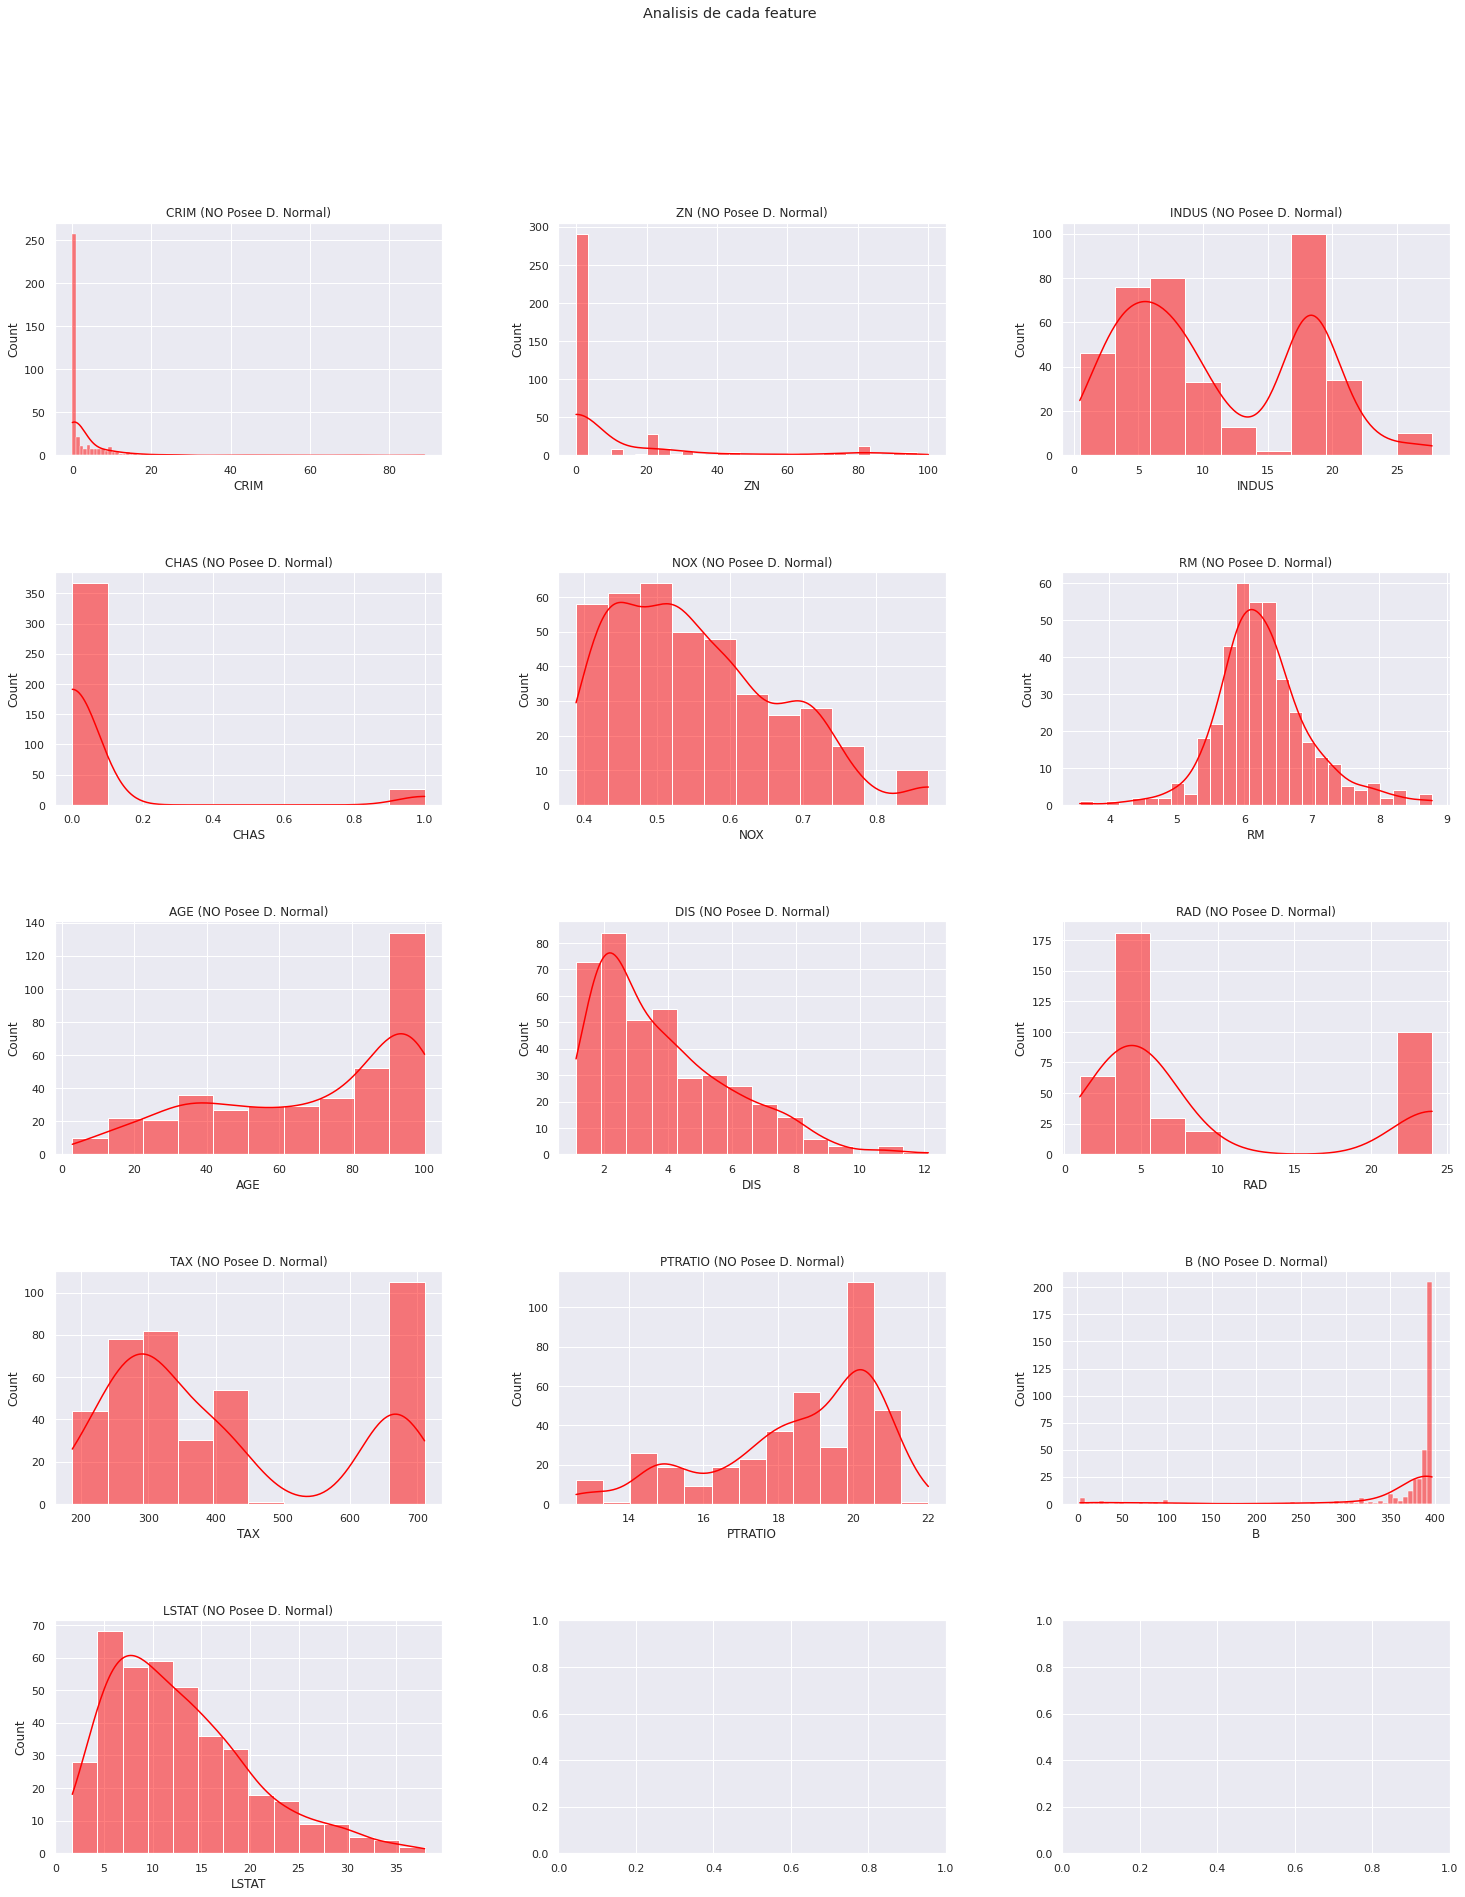

In [160]:
DF_analysis(features,5,3)

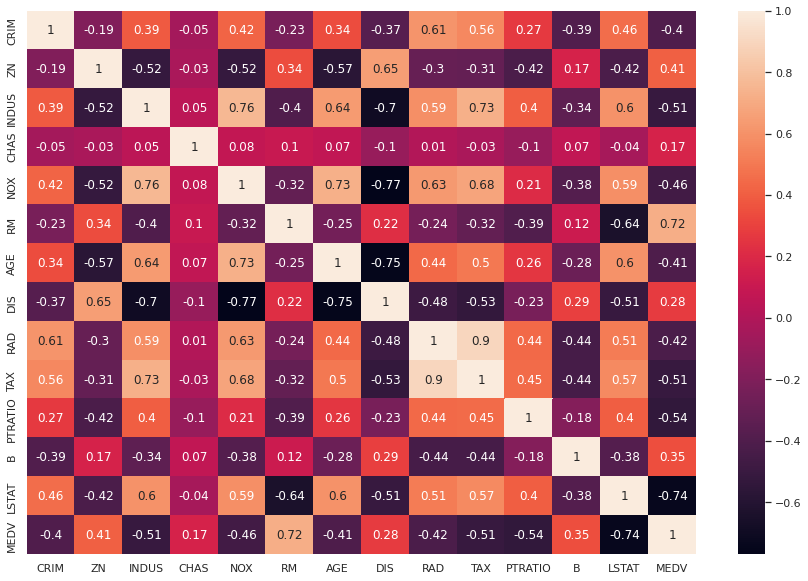

In [161]:
# Matriz de correlacion de los datos

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
sns.set(rc={"figure.figsize":(15,10)})

In [162]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# Se crea una matriz que contiene versiones del dataset con distinta
# cantidad de features

n = 1
k = []
selected_features = []

for i in range(2,13):

  f = pd.DataFrame(SelectKBest(f_regression, k=i).fit_transform(features, target))
  selected_features.append(f)
  k.append(i)
  n = n + 1

selected_features.append(features)
k.append(i+1)


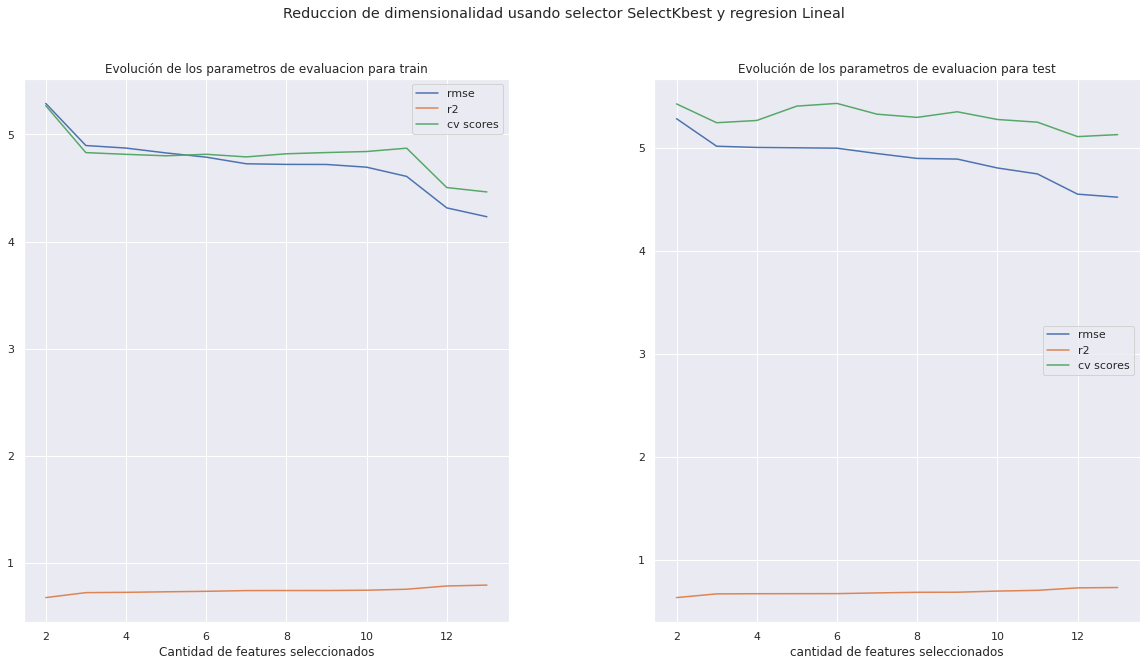

In [163]:
from sklearn.linear_model import LinearRegression

Regression(LinearRegression(), selected_features, target, 
           n, k, 'SelectKbest', 'Lineal')

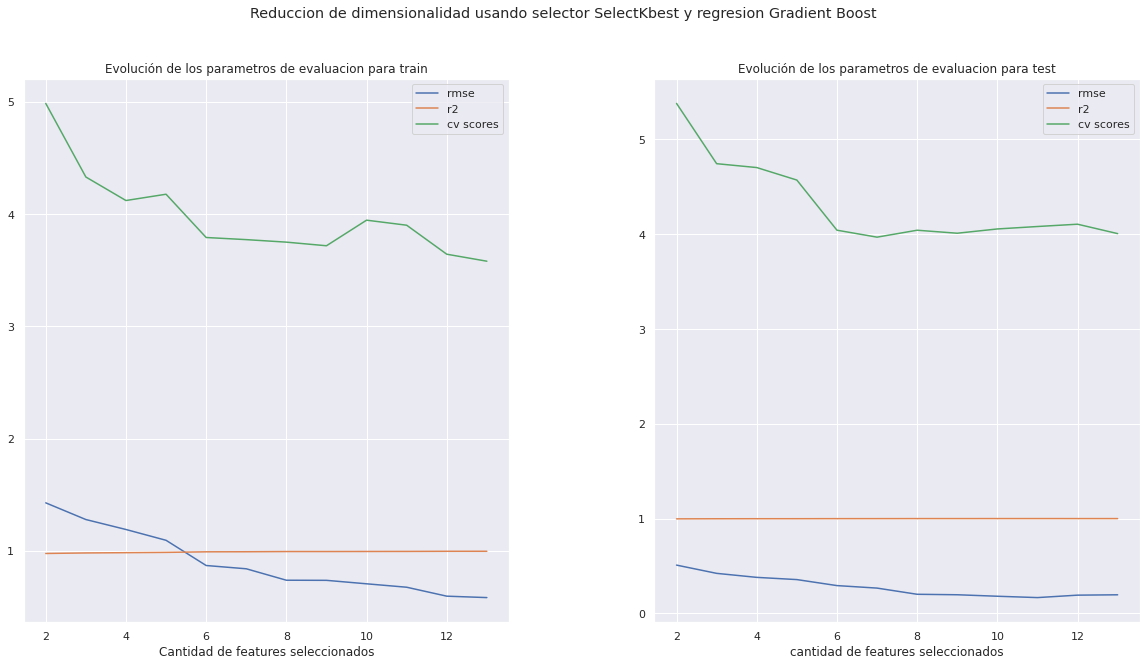

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

Regression(GradientBoostingRegressor(n_estimators = 200,
                random_state = 0, learning_rate= 0.1), 
           selected_features, target, n, k, 'SelectKbest', 
           'Gradient Boost')

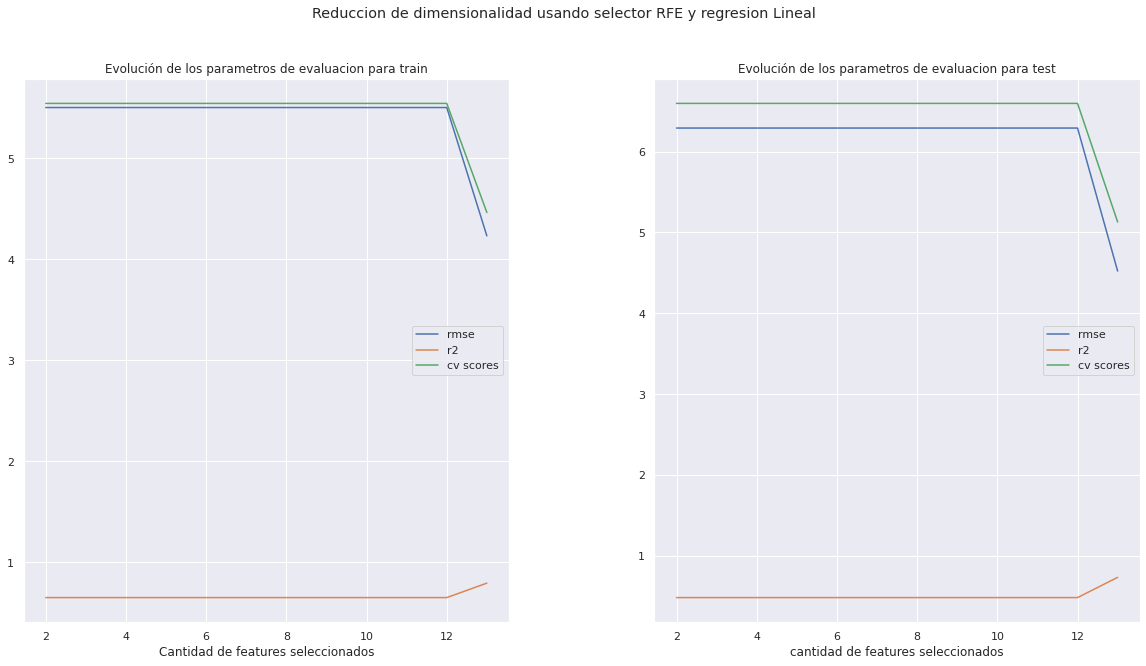

In [165]:
from sklearn.feature_selection import RFE

model = LinearRegression()

n = 1
k = []
selected_features2 = []

for i in range(2,13):

  f = pd.DataFrame(RFE(model, n_features_to_select = 3).fit_transform(features, target))
  selected_features2.append(f)
  k.append(i)
  n = n + 1

selected_features2.append(features)
k.append(i+1)

Regression(model, selected_features2, target, 
           n, k, 'RFE', 'Lineal')

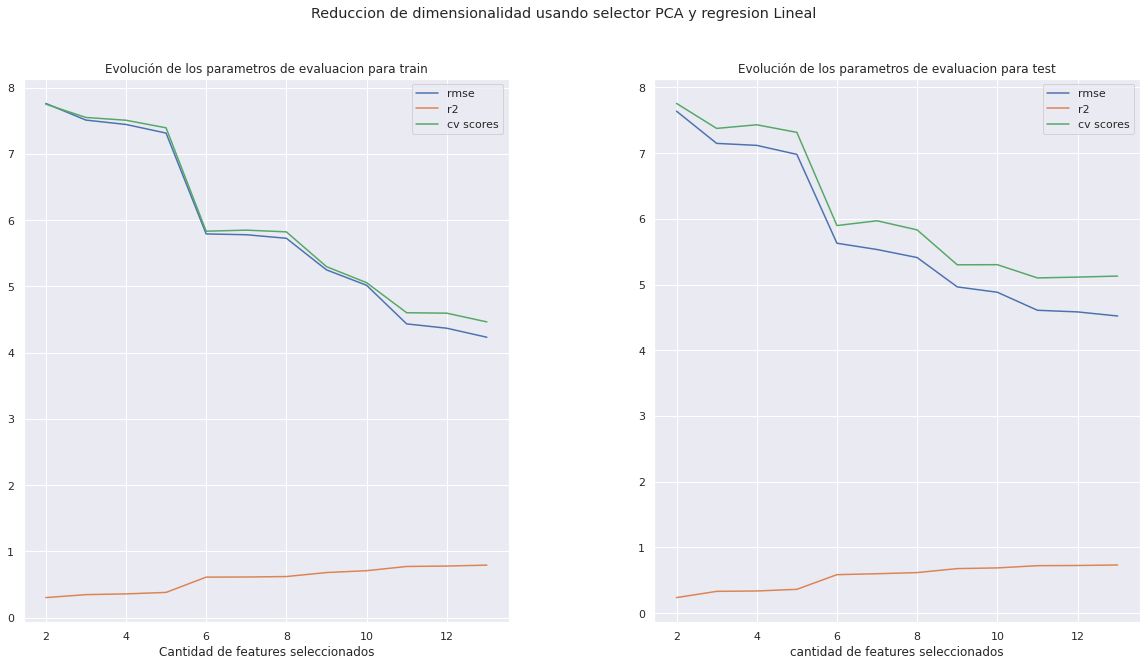

In [166]:
from sklearn.decomposition import PCA

n = 1
k = []
selected_features3 = []

for i in range(2,13):

  f = pd.DataFrame(PCA( n_components = i, random_state = 0).fit_transform(features, target))
  selected_features3.append(f)
  k.append(i)
  n = n + 1

selected_features3.append(features)
k.append(i+1)

Regression(model, selected_features3, target, 
           n, k, 'PCA', 'Lineal')

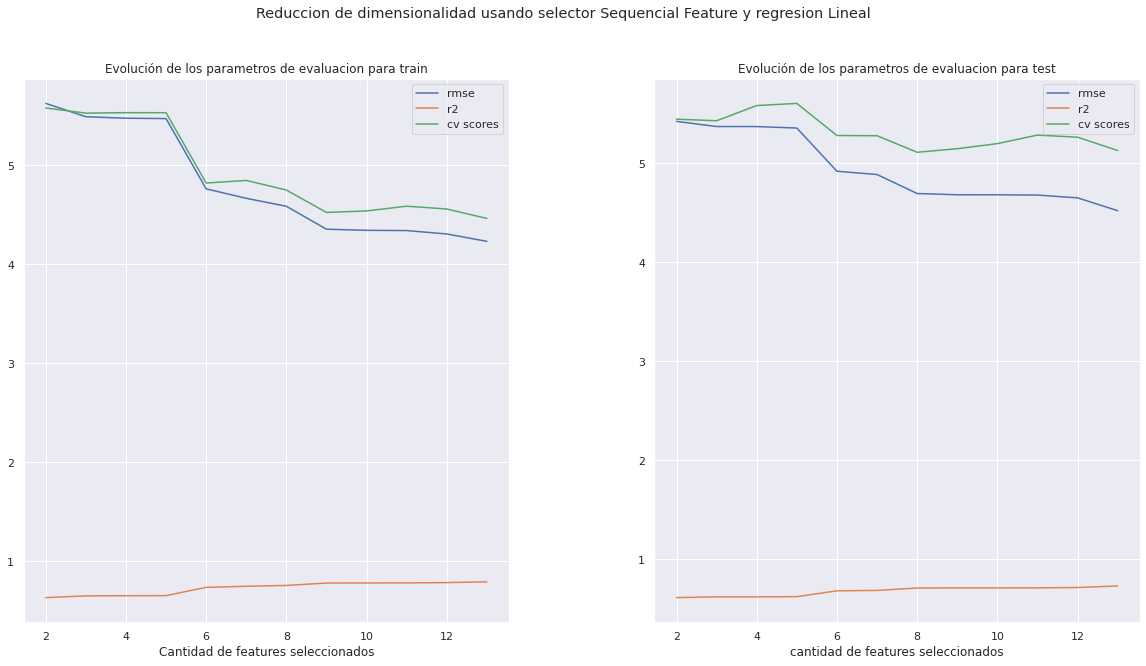

In [167]:
from sklearn.feature_selection import SequentialFeatureSelector

n = 1
k = []
selected_features4 = []

for i in range(2,13):

  f = pd.DataFrame(SequentialFeatureSelector(model,
           n_features_to_select = i).fit_transform(features,target))
  selected_features4.append(f)
  k.append(i)
  n = n + 1

selected_features4.append(features)
k.append(i+1)

Regression(model, selected_features4, target, 
           n, k, 'Sequencial Feature', 'Lineal')




In [168]:
"""
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

df.info()
print()
print(df.shape)
print()

df.dropna()
features_names = df.keys()
#print(features_names)
target = df['diagnosis']
features = df.drop(columns = ['diagnosis', 'id', 'Unnamed: 32'])
"""

'\ndf = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")\n\ndf.info()\nprint()\nprint(df.shape)\nprint()\n\ndf.dropna()\nfeatures_names = df.keys()\n#print(features_names)\ntarget = df[\'diagnosis\']\nfeatures = df.drop(columns = [\'diagnosis\', \'id\', \'Unnamed: 32\'])\n'